In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pylab as plt

import scipy
from scipy import linalg

import sklearn
import math
from sklearn.preprocessing import StandardScaler

In [2]:
from scipy import signal
import random
def createCircle2(width,height , rad ):
    w = random.randint(1, height)
    h = random.randint(1, height)
    center = [int(w), int(h)]
    radius = rad
    Y, X = np.ogrid[:height, :width]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)
    mask1 = dist_from_center #<= radius
    mask1 = dist_from_center <= radius
    
    
    w = random.randint(1, height)
    h = random.randint(1, height)
    center = [int(w), int(h)]
    radius = rad
    Y, X = np.ogrid[:height, :width]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)
    mask2 = dist_from_center #<= radius
    mask2 = dist_from_center <= radius
    
    
    
    w = random.randint(1, height)
    h = random.randint(1, height)
    center = [int(w), int(h)]
    radius = rad
    Y, X = np.ogrid[:height, :width]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)
    mask3 = dist_from_center #<= radius
    mask3 = dist_from_center <= radius
    
    return mask1, mask2, mask3
    
    
    

In [3]:
m1, m2, m3 = createCircle2(width = 36, height = 36 , rad = 2 )

def addCircle2(test_image, v1, v2, v3):
    masked_img = test_image.copy()
    masked_img[m1] = v1
    masked_img[m2] = v2
    masked_img[m3] = v3
    return masked_img


In [4]:
def add_noise(image, sigma):
   row, col = image.shape
   gauss = np.random.normal(0, sigma, (row, col))
   gauss = gauss.reshape(row, col)
   noisy = image + gauss # adding gauss noise 
   return noisy

In [5]:
NOISE_STD = 0.0001

ims1 = np.zeros((500, 36, 36)) # initialize your array

def v1_func(i):
    return 0.1 * np.sin(0.11 * i)

def v2_func(i):
    return 0.1 * np.cos(0.07 * i)

def v3_func(i):
    return 0.1 * np.sin(0.11 * i) ** 2 + 0.21 * np.cos(0.077 * i)

for i in range(500):
    v1 = v1_func(i)
    v2 = v2_func(i)
    v3 = v3_func(i)
    blank_image = np.zeros((36, 36))
    image_with_circles = addCircle2(blank_image, v1, v2, v3)
    noisy_image_with_circles = add_noise(image_with_circles, NOISE_STD)
    ims1[i, ...] = noisy_image_with_circles

(500, 36, 36)


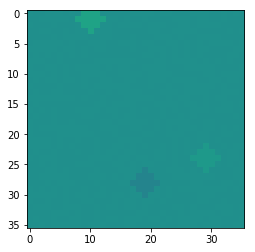

In [6]:
#Plot

plt.imshow(ims1[98,:,:], vmin=-1., vmax=1.)
print(ims1.shape)

# Test 1 on ims1 (100, 36, 36)


In [7]:
ims_flat = ims1.reshape(500,1296)

#Standardizing original matrix
ims_std_1 = StandardScaler().fit_transform(ims_flat)
print(ims_std_1.shape) #(500, 1296)

#Covariance of original matrix
cov_1 = np.cov(ims_std_1.T)
print(cov_1.shape) #(1296, 1296)

(500, 1296)
(1296, 1296)


In [8]:
#Finding Eigenvalues and Eigenvectors of original matrix
eig_vals_1, eig_vecs_1 = np.linalg.eigh(cov_1)
print(eig_vals_1.shape) #(1296,)
print(eig_vecs_1.shape) #(1296, 1296)

(1296,)
(1296, 1296)


In [9]:
idx = eig_vals_1.argsort()[::-1]   
eigenValues = eig_vals_1[idx]
eigenVectors = eig_vecs_1[:, idx]

In [10]:
k = 10

In [11]:
#choose 10 eigen vectors and eigen values
k_eigenValues = eigenValues[:k]  #(10,)
k_eigenVectors = eigenVectors[:, :k] #(1296, 10)

In [12]:
k_eigenVectors.shape

(1296, 10)

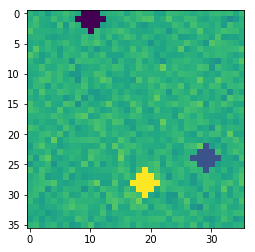

In [13]:
plt.imshow(k_eigenVectors[:, 2].reshape((36, 36)))

In [14]:
pca_data = np.dot(ims_std_1, k_eigenVectors)
print(pca_data.shape) #(500, 10)

(500, 10)


In [15]:
from sklearn.decomposition import FastICA, PCA

ica = FastICA(n_components = k, max_iter = 3000, tol = 0.3)
S_1 = ica.fit_transform(pca_data)  # Reconstruct signals
A_1 = ica.mixing_  # Get estimated mixing matrix

In [16]:
print(S_1.shape) #(500, 10)

(500, 10)


In [17]:
print(A_1.shape) #(10, 10)

(10, 10)


In [18]:
W_1 = np.linalg.inv(A_1) #unmixing matrix
print(W_1.shape) #(10, 10)

(10, 10)


In [19]:
lc_1 = np.dot(W_1,k_eigenVectors.T) #Linear combinations
print(lc_1.shape) #(10, 1296)

(10, 1296)


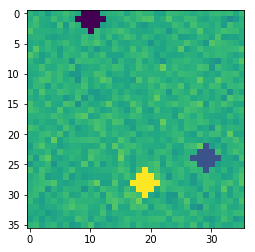

In [20]:
plt.imshow(k_eigenVectors[:, 2].reshape((36, 36)))

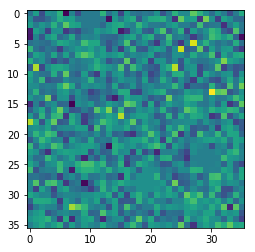

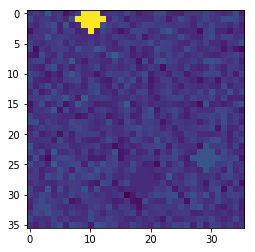

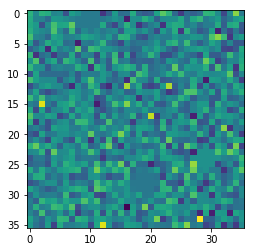

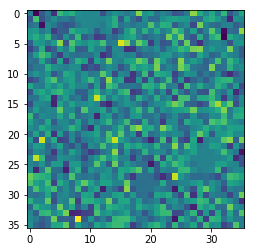

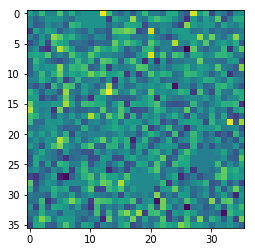

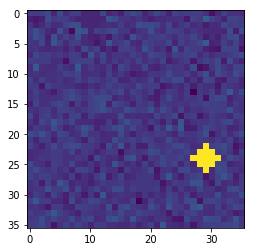

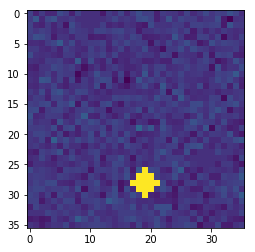

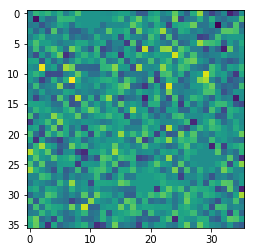

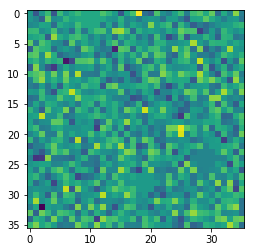

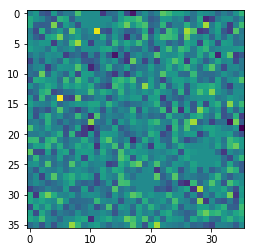

In [21]:
for i in range(k):
    plt.imshow(lc_1[i,:].reshape((36, 36)))
    plt.show() 

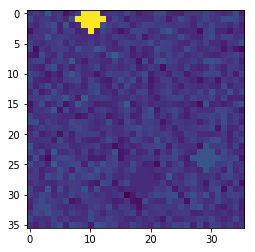

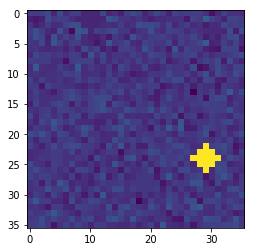

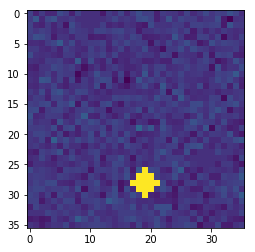

In [47]:
plt.imshow(lc_1[1,:].reshape((36, 36)))
plt.show()
plt.imshow(lc_1[5,:].reshape((36, 36)))
plt.show()
plt.imshow(lc_1[6,:].reshape((36, 36)))
plt.show()

# Test on resized movie

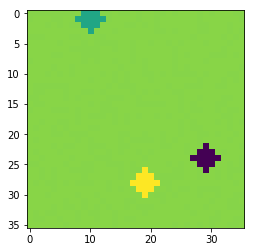

In [23]:
# plot one frame of the movie for testing
frame_index = 20
pixel_skip = 1
resized_movie = ims1[:, ::pixel_skip, ::pixel_skip]
plt.imshow(resized_movie[141, :, :])

In [24]:
print(resized_movie.shape)

(500, 36, 36)


In [25]:
ims_flat_rm = resized_movie.reshape(500,1296)

#Standardizing original matrix
ims_std_1_rm = StandardScaler().fit_transform(ims_flat_rm)
print(ims_std_1_rm.shape) #(500, 1296)

#Covariance of original matrix
cov_1_rm = np.cov(ims_std_1_rm.T)
print(cov_1_rm.shape) #(1296, 1296)

(500, 1296)
(1296, 1296)


In [26]:
#Finding Eigenvalues and Eigenvectors of original matrix
eig_vals_1_rm, eig_vecs_1_rm = np.linalg.eigh(cov_1_rm)
print(eig_vals_1_rm.shape) #(1296,)
print(eig_vecs_1_rm.shape) #(1296, 1296)

(1296,)
(1296, 1296)


In [27]:
idx_rm = eig_vals_1_rm.argsort()[::-1]   
eigenValues_rm = eig_vals_1_rm[idx_rm]
eigenVectors_rm = eig_vecs_1_rm[:, idx_rm]

In [28]:
k_rm=10

In [29]:
#choose 10 eigen vectors and eigen values
k_eigenValues_rm = eigenValues_rm[:k_rm]  #(10,)
k_eigenVectors_rm = eigenVectors_rm[:, :k_rm] #(1296, 10)

In [30]:
k_eigenVectors_rm.shape

(1296, 10)

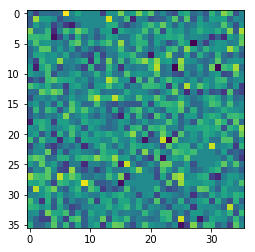

In [31]:
plt.imshow(k_eigenVectors_rm[:, 4].reshape((36, 36)))

In [32]:
pca_data_rm = np.dot(ims_std_1_rm, k_eigenVectors_rm)
print(pca_data_rm.shape) #(500, 10)

(500, 10)


In [33]:
from sklearn.decomposition import FastICA, PCA

ica_rm = FastICA(n_components = k, max_iter = 3000, tol = 0.3)
S_1_rm = ica_rm.fit_transform(pca_data_rm)  # Reconstruct signals
A_1_rm = ica_rm.mixing_  # Get estimated mixing matrix

In [34]:
print(S_1_rm.shape) #(500, 10)
print(A_1_rm.shape) #(10, 10)

(500, 10)
(10, 10)


In [35]:
W_1_rm = np.linalg.inv(A_1_rm) #unmixing matrix
print(W_1_rm.shape) #(10, 10)

(10, 10)


In [36]:
lc_1_rm = np.dot(W_1_rm,k_eigenVectors_rm.T) #Linear combinations
print(lc_1_rm.shape) #(10, 1296)

(10, 1296)


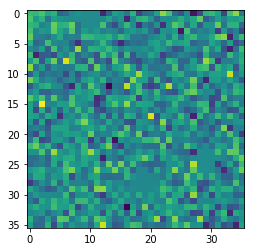

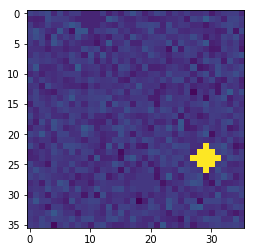

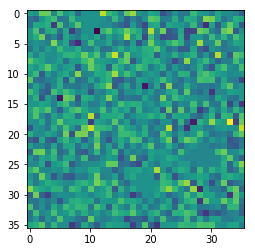

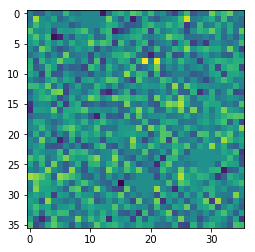

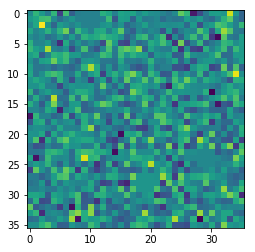

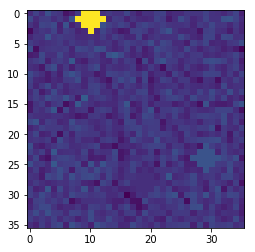

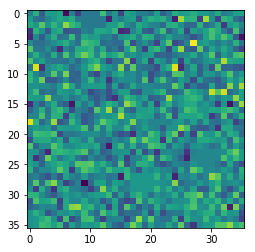

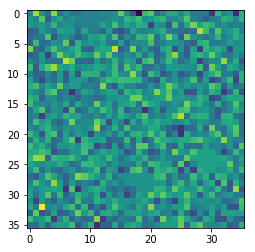

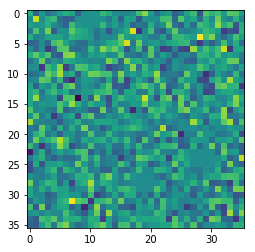

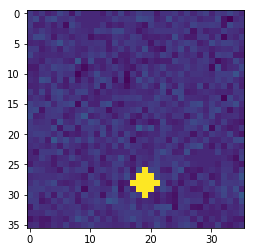

In [48]:
for i in range(k_rm):
    plt.imshow(lc_1_rm[i,:].reshape((36, 36)))
    plt.show() 

# After PCA, ICA

In [38]:
#Temporal skewness of Independent Components
temporal_skewness = scipy.stats.skew(lc_1, axis = 1, bias = True)
print(temporal_skewness.shape) #(23040,)

(10,)


In [39]:
idx_skewness = temporal_skewness.argsort()[::-1]   
skewness = temporal_skewness[idx_skewness]
lc_2 = lc_1[idx_skewness, :]
print(skewness.shape)
print(lc_2.shape)

(10,)
(10, 1296)


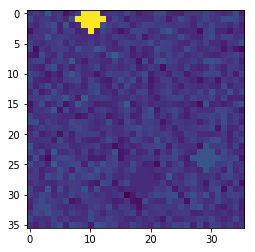

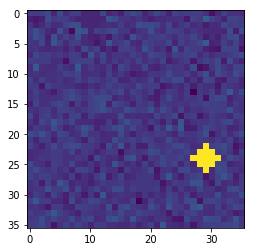

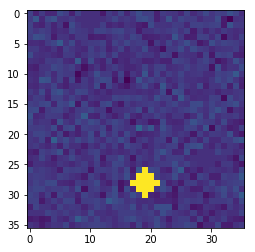

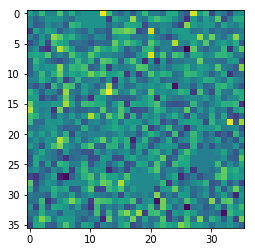

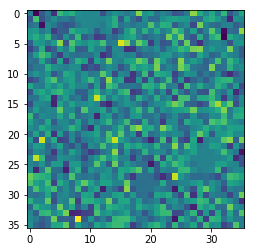

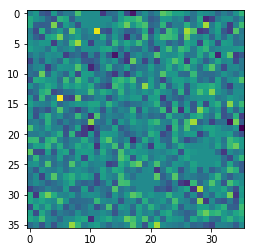

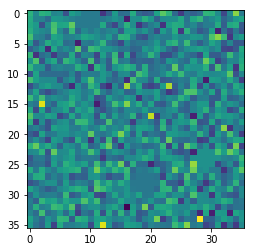

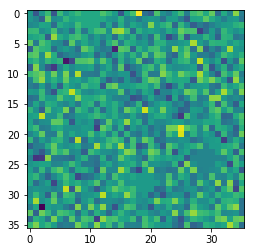

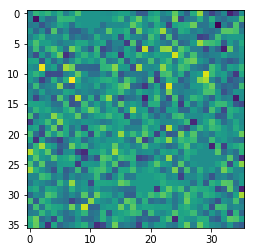

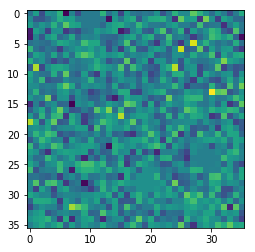

In [40]:
for i in range(k_rm):
    plt.imshow(lc_2[i,:].reshape((36, 36)))
    plt.show() 

In [41]:
#Gaussian filter
gauss_filter = scipy.ndimage.filters.gaussian_filter(lc_2, sigma=0.8)
print(gauss_filter.shape)

(10, 1296)


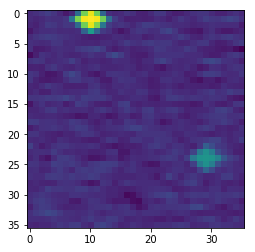

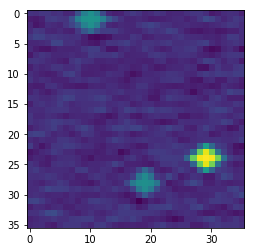

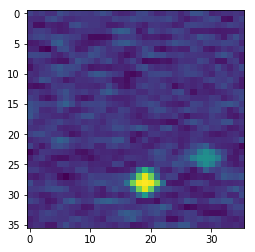

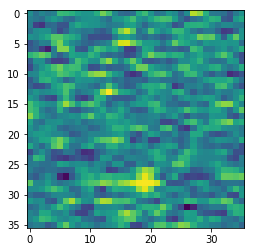

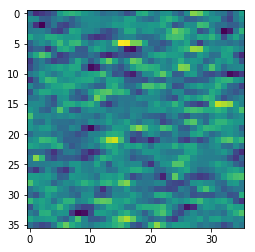

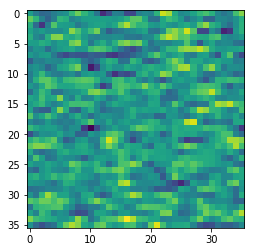

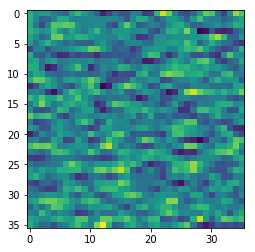

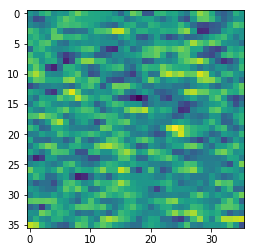

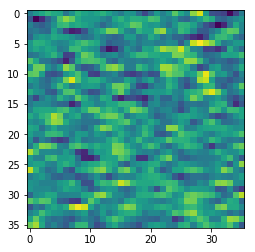

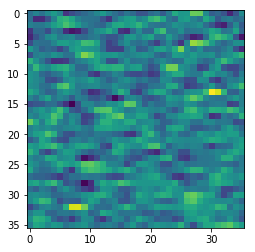

In [42]:
for i in range(k_rm):
    plt.imshow(gauss_filter[i,:].reshape((36, 36)))
    plt.show() 

In [43]:
#Derive a threshold for neuron segmentation
 
from skimage import filters 
 
im = lc_1

#thresholds 
thresh_yen = filters.threshold_yen(im)
binary_yen = im > thresh_yen 

thresh_otsu = filters.threshold_otsu(im)
binary_otsu = im > thresh_otsu

thresh_li = filters.threshold_li(im)
binary_li = im > thresh_li

thresh_iso = filters.threshold_isodata(im)
binary_iso = im > thresh_iso

thresh_mean = filters.threshold_mean(im)
binary_mean = im > thresh_mean

thresh_min = filters.threshold_minimum(im)
binary_min = im > thresh_min

In [44]:
print(thresh_yen)
print(thresh_min)

0.0005476790750071584
0.0022943416113969206


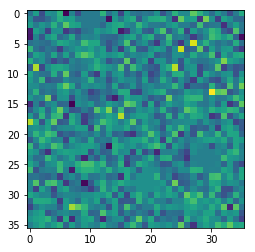

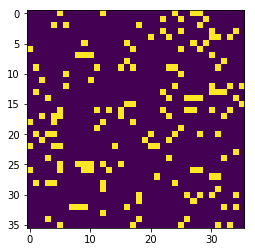

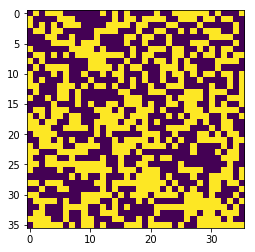

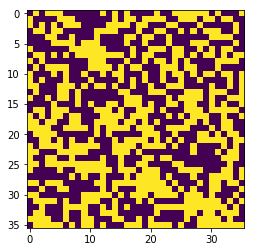

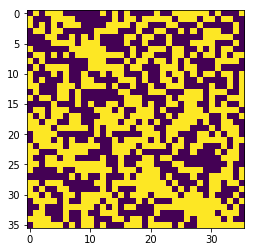

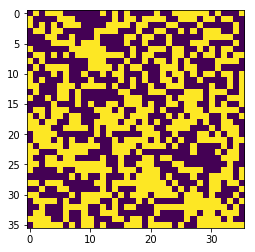

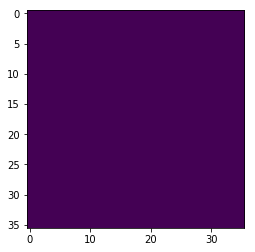

In [45]:
ic1=0
ic2=2
ic3=3
pix_x=36
pix_y=36
plt.imshow(im[ic1,:].reshape((pix_x, pix_y)))
plt.show()
plt.imshow(binary_yen[ic1,:].reshape((pix_x, pix_y)))
plt.show()
plt.imshow(binary_otsu[ic1,:].reshape((pix_x, pix_y)))
plt.show()
plt.imshow(binary_li[ic1,:].reshape((pix_x, pix_y)))
plt.show()
plt.imshow(binary_iso[ic1,:].reshape((pix_x, pix_y)))
plt.show()
plt.imshow(binary_mean[ic1,:].reshape((pix_x, pix_y)))
plt.show()
plt.imshow(binary_min[ic1,:].reshape((pix_x, pix_y)))
plt.show()

In [46]:
#Create a label matrix from a binary image 
 
from skimage.measure import label
from skimage.measure import regionprops


#label neurons with an integer. Each neuron gets a unique integer
label_image = label(binary_yen)
label_image_1 = label(binary_min)


#extract various metrics from each of the labeled regions
rprops = regionprops(label_image)
rprops_1 = regionprops(label_image_1)

#print all the available metrics extracted by regionprops
metrics = [item for item in dir(rprops[0]) if item[0:1] is not "_"]
print("Metrics that are quantified by regionprops:")
print(metrics)

metrics_1 = [item for item in dir(rprops_1[0]) if item[0:1] is not "_"]
print("Metrics that are quantified by regionprops:")
print(metrics_1)
print(centroid)

Metrics that are quantified by regionprops:
['area', 'bbox', 'bbox_area', 'centroid', 'convex_area', 'convex_image', 'coords', 'eccentricity', 'equivalent_diameter', 'euler_number', 'extent', 'filled_area', 'filled_image', 'image', 'inertia_tensor', 'inertia_tensor_eigvals', 'intensity_image', 'label', 'local_centroid', 'major_axis_length', 'max_intensity', 'mean_intensity', 'min_intensity', 'minor_axis_length', 'moments', 'moments_central', 'moments_hu', 'moments_normalized', 'orientation', 'perimeter', 'solidity', 'weighted_centroid', 'weighted_local_centroid', 'weighted_moments', 'weighted_moments_central', 'weighted_moments_hu', 'weighted_moments_normalized']
Metrics that are quantified by regionprops:
['area', 'bbox', 'bbox_area', 'centroid', 'convex_area', 'convex_image', 'coords', 'eccentricity', 'equivalent_diameter', 'euler_number', 'extent', 'filled_area', 'filled_image', 'image', 'inertia_tensor', 'inertia_tensor_eigvals', 'intensity_image', 'label', 'local_centroid', 'major

NameError: name 'centroid' is not defined

In [ ]:
#Plot the label matrix as an image 
for i in range(k_rm):
    plt.imshow(-label_image[i,:].reshape(pix_x, pix_y))
    plt.show()


In [ ]:
#Plot the label matrix as an image 
for i in range(k):
    plt.imshow(-label_image_1[i,:].reshape(pix_x, pix_y))
    plt.show()


In [ ]:
im3 = label_image_1
rows = 10
cols = 36*36
val = np.zeros(200)
for x in range(0, rows):
    for y in range(0, cols):
        if im3[x,y] < thresh_min:
            im3[x,y] = 0

In [50]:
print(im3)

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]
